# Исследование надежности заемщиков


## Описание проекта

Наш заказчик — кредитный отдел банка. 

**Цель проекта** - разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных**

children — количество детей в семье

days_employed — общий трудовой стаж в днях

dob_years — возраст клиента в годах

education — уровень образования клиента

education_id — идентификатор уровня образования

family_status — семейное положение

family_status_id — идентификатор семейного положения

gender — пол клиента

income_type — тип занятости

debt — имел ли задолженность по возврату кредитов

total_income — ежемесячный доход
    
purpose — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
data_pivot_children = data.pivot_table(values = ['debt'], index=['children'], aggfunc='sum')
data_pivot_children['total_children'] = data['children'].value_counts()
data_pivot_children['debt_chance_percetage'] = data_pivot_children['debt'] / data_pivot_children['total_children'] * 100
data_pivot_children


,debt,total_children,debt_chance_percetage
children,,,
0,1063,14107,7.535266
1,444,4809,9.232689
2,194,2052,9.454191
3,27,330,8.181818
4,4,41,9.756098
5,0,9,0.000000


**Вывод:** 

Зависимость между количеством детей и возвратом кредита в срок есть. С увеличением количества детей вероятность задержки по кредиту увеличивается примерно на 1-2%.

Данные не совсем однозначные, потому что семьи с тремя детьми выбиваются из общего тренда, хотя и в них вероятность задержки выше.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Верно! Отлично, что ты используешь сводную таблицу
</div>

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [23]:
data_pivot_family = data.pivot_table(values=['debt'], index='family_status', aggfunc = 'sum')
data_pivot_family['total'] = data['family_status'].value_counts()
data_pivot_family['debt_chance'] = data_pivot_family['debt'] / data_pivot_family['total'] * 100
data_pivot_family


,debt,total,debt_chance
family_status,,,
Не женат / не замужем,273,2796,9.763948
в разводе,84,1189,7.064760
вдовец / вдова,63,951,6.624606
гражданский брак,385,4146,9.286059
женат / замужем,927,12266,7.557476


**Вывод:**

Данные говорят в пользу наличия зависимости между семейным положением и возвратом кредита в срок. 

Люди не в браке представляют собой группу риска с вероятностью задержки в примерно 11%. Зарегистрированный брак повышает вероятность возврата кредита в срок примерно на 3%. При этом, гражданский брак имеет менее выраженный эффект (вероятность возврата повышается на <1%). Люди в трудном семейном положении (развод/лишение супруга) с наибольшей вероятностью выплатят кредит в срок.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тут всё правильно
</div>

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [24]:
data_pivot_income = data.pivot_table(index=['total_income_category'], columns='debt', values = 'total_income', aggfunc = 'count')
data_pivot_income = data_pivot_income.fillna(0)
data_pivot_income['debt_chance'] = data_pivot_income[1] / data_pivot_income[0] * 100
data_pivot_income


debt,0,1,debt_chance
total_income_category,,,
A,23,2,8.695652
B,4660,354,7.596567
C,14585,1353,9.276654
D,328,21,6.402439
E,20,2,10.000000


Посмотрим на визуализацию таблицы, чтобы подчеркнуть различия между группами. Как мы видим, категория С (доходы от 50001 до 20000 у.е.) представлена значительно лучше других, а значит наиболее показательна.

<AxesSubplot:title={'center':'debt vs total'}, xlabel='total_income_category'>

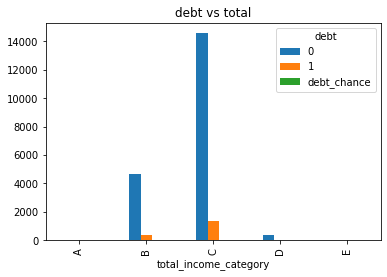

In [25]:
graph = data_pivot_income.plot(kind='bar', title='debt vs total')
graph

Следующая визуализация показывает, что процент должников между группами отличается не равномерно. 
Максимальный шанс не вернуть кредит в срок — у группы E, а минимальный — у группы D, хотя они находятся рядом с точки зрения уровня дохода.

<AxesSubplot:title={'center':'debt chance'}, xlabel='total_income_category'>

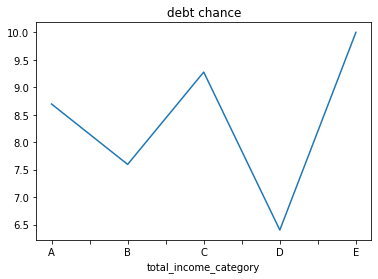

In [26]:
p = data_pivot_income['debt_chance'] = data_pivot_income[1] / data_pivot_income[0] * 100
p.plot(title='debt chance')

**Вывод:** 

На основе имеющихся данных нельзя сделать вывод о существовании зависимости между уровнем дохода и возвратом кредита в срок.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [27]:
data_pivot_purpose = data.pivot_table(index=['purpose_category'], columns='debt', values = 'total_income', aggfunc = 'count')
data_pivot_purpose = data_pivot_purpose.fillna(0)
data_pivot_purpose['debt_chance'] = data_pivot_purpose[1] / data_pivot_purpose[0] * 100
data_pivot_purpose


debt,0,1,debt_chance
purpose_category,,,
операции с автомобилем,3881,400,10.306622
операции с недвижимостью,9974,780,7.820333
получение образования,3620,369,10.193370
проведение свадьбы,2141,183,8.547408


**Вывод:** 

Согласно имеющимся данным, операции с недвижимостью наименее рискованные с точки зрения возврата денег (шанс возврата 92%), тогда как операции с автомобилями и образованием, наоборот, наиболее рискованные (шанс возврата 90%). Свадьбы занимают промежуточное положение между названными категориями (шанс возврата 91%).

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

Данные могут отсутствовать из-за ошибки ввода данных, некорректного форматирования и многих других причин. 

В данном случае каким-то образом связаны столбцы days_employed и total_income, поскольку они содержат одинаковое количество пропусков. Могу отметить, что столбец days_employed отражает информацию о днях в формате float64, что не соответствует здравому смыслу.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

Это делается для того, чтобы не изменить основные характеристики массива данных. Если, допустим, подставлять произвольные значения, то возможны искажения в распределении значений группы данных в последующем. Пропуски в количественных переменных заполняют характерными значениями для данной выборки, а для этого лучше всего подходят медианные значения. Они не изменяют характер распределения.

Мы выбираем медиану, а не среднее арифметическое, потому что она сохраняет пропорции в выборке (середину упорядоченного набора данных). Среднее значение может быть смещено в ту или иную сторону, если наша выборка не симметричная. Плюс, среднее значение плохо работает с числами, которые сильно выделяются на общем фоне (как в примере с зарплатами из данного модуля). Всё это может создасть дисбаланс и повлиять на результаты исследования.

## Общий вывод.

Вернемся к вопросу, поставленному в начале исследования: влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок? 

Наш ответ: влияние есть. 

С одной стороны, чем больше в семье детей, тем в целом выше вероятность задержки по кредиту. Это можно объяснить ухудшением финансового положения семьи (траты возрастают, а доходы семьи не всегда могут их компенсировать). С другой стороны, семейное положение также играет важную роль. Состояние вне брака выступает как наиболее рискованное с точки зрения возврата кредита в срок. Свободное положение человека, не связанного узами ответственности и взаимопомощи с партнером, может привести к нарушению обязательств.

Таким образом, мы получаем портрет человека, с наиболее высокими шансами оказаться в должниках:

1. Не женат / не замужем;
2. 2-е детей;
3. Уровень дохода: 0–30000 у.е.;
4. Цель кредита: операции с автомобилем.
